<a href="https://colab.research.google.com/github/tanmayb104/Social_And_Information_Network_Project/blob/main/SIN_project__review3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip


In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statistics as stat
from mpl_toolkits.basemap import Basemap

In [ ]:
airlines = pd.read_csv("sample_data/airlines.csv")
airlines.head()

IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways

In [ ]:
airports = pd.read_csv("sample_data/airports-extended.csv", names=["Airport ID", "Airport Name", "City", "Country", "IATA", "ICAO", "Latitude", "Longitude", "Altitude", "Timezone", "DST", "Tz database", "Type", "Source"])
airports.head()

Airport ID  ...       Source
0           1  ...  OurAirports
1           2  ...  OurAirports
2           3  ...  OurAirports
3           4  ...  OurAirports
4           5  ...  OurAirports

[5 rows x 14 columns]

In [ ]:
routes = pd.read_csv("sample_data/routes.csv")
routes.head()

Airline Airline ID Source airport  ... Codeshare Stops Equipment
0      2B        410            AER  ...       NaN     0       CR2
1      2B        410            ASF  ...       NaN     0       CR2
2      2B        410            ASF  ...       NaN     0       CR2
3      2B        410            CEK  ...       NaN     0       CR2
4      2B        410            CEK  ...       NaN     0       CR2

[5 rows x 9 columns]

In [ ]:
population = pd.read_csv("sample_data/population_by_country_2020 (1).csv")
population.head()

Country (or dependency)  Population (2020)  ... Urban Pop %  World Share
0                   China         1440297825  ...        61 %      18.47 %
1                   India         1382345085  ...        35 %      17.70 %
2           United States          331341050  ...        83 %       4.25 %
3               Indonesia          274021604  ...        56 %       3.51 %
4                Pakistan          221612785  ...        35 %       2.83 %

[5 rows x 11 columns]

In [ ]:
routes.drop_duplicates(subset=["Source airport", "Destination airport"] ,keep = False, inplace = True)
routes_graph = nx.from_pandas_edgelist(routes, source="Source airport", target="Destination airport")

In [ ]:
nx.info(routes_graph)

'Graph with 3152 nodes and 11150 edges'

In [ ]:
routes_graph.nodes()

NodeView(('AER', 'KZN', 'ASF', 'MRV', 'CEK', 'DME', 'NBC', 'TGK', 'UUA', 'EGO', 'KGD', 'GYD', 'SVX', 'LED', 'BTK', 'IKT', 'OVB', 'KCK', 'PCL', 'TPP', 'ABJ', 'BOY', 'ACC', 'OUA', 'COO', 'DKR', 'BOD', 'ZRH', 'BRS', 'GVA', 'LPA', 'ARN', 'HAD', 'JKG', 'KSD', 'MHQ', 'OER', 'POR', 'TRF', 'VXO', 'KOK', 'TKU', 'OSL', 'ADQ', 'AOS', 'KKB', 'KLN', 'KZB', 'SYB', 'KYK', 'KOZ', 'ORI', 'KPR', 'BSB', 'OPS', 'CAC', 'GRU', 'CGR', 'DOU', 'GIG', 'RAO', 'UBA', 'VDC', 'UDI', 'BRL', 'ORD', 'STL', 'DEC', 'JBR', 'CGA', 'HYL', 'KTB', 'KTN', 'DLA', 'LOS', 'FNA', 'LGW', 'ROB', 'AKV', 'YIK', 'YPX', 'XGR', 'YVP', 'YGL', 'YGW', 'YUL', 'YPH', 'YSK', 'YUD', 'YUY', 'YZG', 'YKG', 'YPJ', 'YQC', 'YKL', 'YQB', 'YZV', 'YTQ', 'YWB', 'JIB', 'JED', 'MGQ', 'NBO', 'HGH', 'SIN', 'SWA', 'ACH', 'EBA', 'DRS', 'DUS', 'FDH', 'MUC', 'HAM', 'OLB', 'TXL', 'ZAD', 'FMM', 'NAP', 'GRZ', 'SZG', 'ATL', 'LWB', 'MCN', 'MEI', 'MSL', 'PIB', 'TUP', 'GLH', 'MCO', 'BGY', 'CMN', 'CUF', 'MPL', 'SAW', 'TSF', 'FEZ', 'TNG', 'NDR', 'PMI', 'AUA', 'LSP', 'PT

In [ ]:
routes_graph.edges()

EdgeView([('AER', 'KZN'), ('AER', 'DYU'), ('AER', 'KIV'), ('AER', 'MSQ'), ('AER', 'TZX'), ('AER', 'LED'), ('AER', 'OMS'), ('AER', 'SVO'), ('AER', 'VKO'), ('AER', 'KJA'), ('AER', 'NSK'), ('KZN', 'ASF'), ('KZN', 'CEK'), ('KZN', 'EGO'), ('KZN', 'SVX'), ('KZN', 'AYT'), ('KZN', 'DWC'), ('KZN', 'SHJ'), ('KZN', 'FEG'), ('KZN', 'SKD'), ('KZN', 'TAS'), ('KZN', 'ALA'), ('KZN', 'SVO'), ('KZN', 'IST'), ('KZN', 'UFA'), ('KZN', 'FRU'), ('KZN', 'OSS'), ('ASF', 'MRV'), ('ASF', 'LED'), ('ASF', 'SCO'), ('ASF', 'SVO'), ('ASF', 'SAW'), ('MRV', 'RTW'), ('MRV', 'SAW'), ('MRV', 'SCO'), ('MRV', 'GYD'), ('MRV', 'TLV'), ('MRV', 'EVN'), ('MRV', 'LED'), ('MRV', 'SVO'), ('MRV', 'DWC'), ('MRV', 'DYU'), ('MRV', 'VKO'), ('CEK', 'FRU'), ('CEK', 'EVN'), ('CEK', 'LED'), ('CEK', 'SVO'), ('CEK', 'DWC'), ('CEK', 'NMA'), ('CEK', 'TAS'), ('DME', 'NBC'), ('DME', 'TGK'), ('DME', 'UUA'), ('DME', 'MJZ'), ('DME', 'PYJ'), ('DME', 'RTW'), ('DME', 'CSY'), ('DME', 'ESL'), ('DME', 'GRV'), ('DME', 'MCX'), ('DME', 'PES'), ('DME', 'PEZ')

In [ ]:
nx.degree(routes_graph)

DegreeView({'AER': 11, 'KZN': 17, 'ASF': 6, 'MRV': 12, 'CEK': 8, 'DME': 102, 'NBC': 7, 'TGK': 1, 'UUA': 2, 'EGO': 8, 'KGD': 6, 'GYD': 17, 'SVX': 43, 'LED': 61, 'BTK': 4, 'IKT': 19, 'OVB': 33, 'KCK': 1, 'PCL': 1, 'TPP': 1, 'ABJ': 11, 'BOY': 2, 'ACC': 21, 'OUA': 10, 'COO': 10, 'DKR': 15, 'BOD': 34, 'ZRH': 60, 'BRS': 56, 'GVA': 61, 'LPA': 43, 'ARN': 64, 'HAD': 2, 'JKG': 2, 'KSD': 2, 'MHQ': 2, 'OER': 1, 'POR': 3, 'TRF': 24, 'VXO': 4, 'KOK': 1, 'TKU': 6, 'OSL': 51, 'ADQ': 7, 'AOS': 2, 'KKB': 2, 'KLN': 2, 'KZB': 1, 'SYB': 2, 'KYK': 1, 'KOZ': 2, 'ORI': 2, 'KPR': 1, 'BSB': 14, 'OPS': 1, 'CAC': 3, 'GRU': 37, 'CGR': 6, 'DOU': 3, 'GIG': 22, 'RAO': 7, 'UBA': 4, 'VDC': 3, 'UDI': 4, 'BRL': 2, 'ORD': 61, 'STL': 32, 'DEC': 2, 'JBR': 1, 'CGA': 3, 'HYL': 1, 'KTB': 2, 'KTN': 10, 'DLA': 11, 'LOS': 36, 'FNA': 6, 'LGW': 88, 'ROB': 3, 'AKV': 2, 'YIK': 2, 'YPX': 4, 'XGR': 1, 'YVP': 10, 'YGL': 3, 'YGW': 8, 'YUL': 48, 'YPH': 4, 'YSK': 3, 'YUD': 3, 'YUY': 1, 'YZG': 2, 'YKG': 3, 'YPJ': 3, 'YQC': 2, 'YKL': 3, 'YQB

In [ ]:
#Finding out the basic characteristics of the Graph.
g_nodes = nx.number_of_nodes(routes_graph)
g_edges = nx.number_of_edges(routes_graph)
g_density = nx.density(routes_graph)
g_number_of_connected_components = nx.number_connected_components(routes_graph)
g_connected_components = nx.connected_components(routes_graph)
degrees = [v for k, v in routes_graph.degree()]
minimum = min(degrees)
maximum = max(degrees)
avg = stat.mean(degrees)
stdev = stat.stdev(degrees)
#Printing the basics of graph
print("Number of nodes : ",g_nodes)
print("Number of edges : ",g_edges)
print("Density : ",g_density)
print("Number of Connected components : ",g_number_of_connected_components)
print("Minimum Degree: ",minimum)
print("Maximum Degree: ",maximum)
print("Average Degree: ",avg)
print("Standard Deviation: ",stdev)

Number of nodes :  3152
Number of edges :  11150
Density :  0.0022452786723093305
Number of Connected components :  30
Minimum Degree:  1
Maximum Degree:  139
Average Degree:  7.074873096446701
Standard Deviation:  12.716576092066298


In [ ]:
routes = pd.read_csv("sample_data/routes.csv")
routes['Source airport ID'] = pd.to_numeric(routes['Source airport ID'].astype(str), 'coerce')
routes['Destination airport ID'] = pd.to_numeric(routes['Destination airport ID'].astype(str), 'coerce')
routes = routes.dropna(subset=["Source airport ID", "Destination airport ID"])
airport_new = airports[['Airport Name','Latitude', 'Longitude', 'IATA', 'ICAO']]
airport_indexs = airport_new.index.values
routes_new = routes[(routes['Source airport ID'].isin(airport_indexs)) &
		                     (routes['Destination airport ID'].isin(airport_indexs))]
routes_new =  pd.DataFrame(routes_new.groupby(['Source airport', 'Destination airport']).size().reset_index(name='counts'))
routes_counts = routes_new['Source airport'].append(routes_new.loc[routes_new['Source airport'] != routes_new['Destination airport'], 'Destination airport']).value_counts()
routes_counts = pd.DataFrame({'IATA': routes_counts.index, 'total_flight': routes_counts})
pos_data = routes_counts.merge(airport_new, on = 'IATA')
graph_new = nx.from_pandas_edgelist(routes_new, source = 'Source airport', target = 'Destination airport', edge_attr = 'counts',create_using = nx.DiGraph())


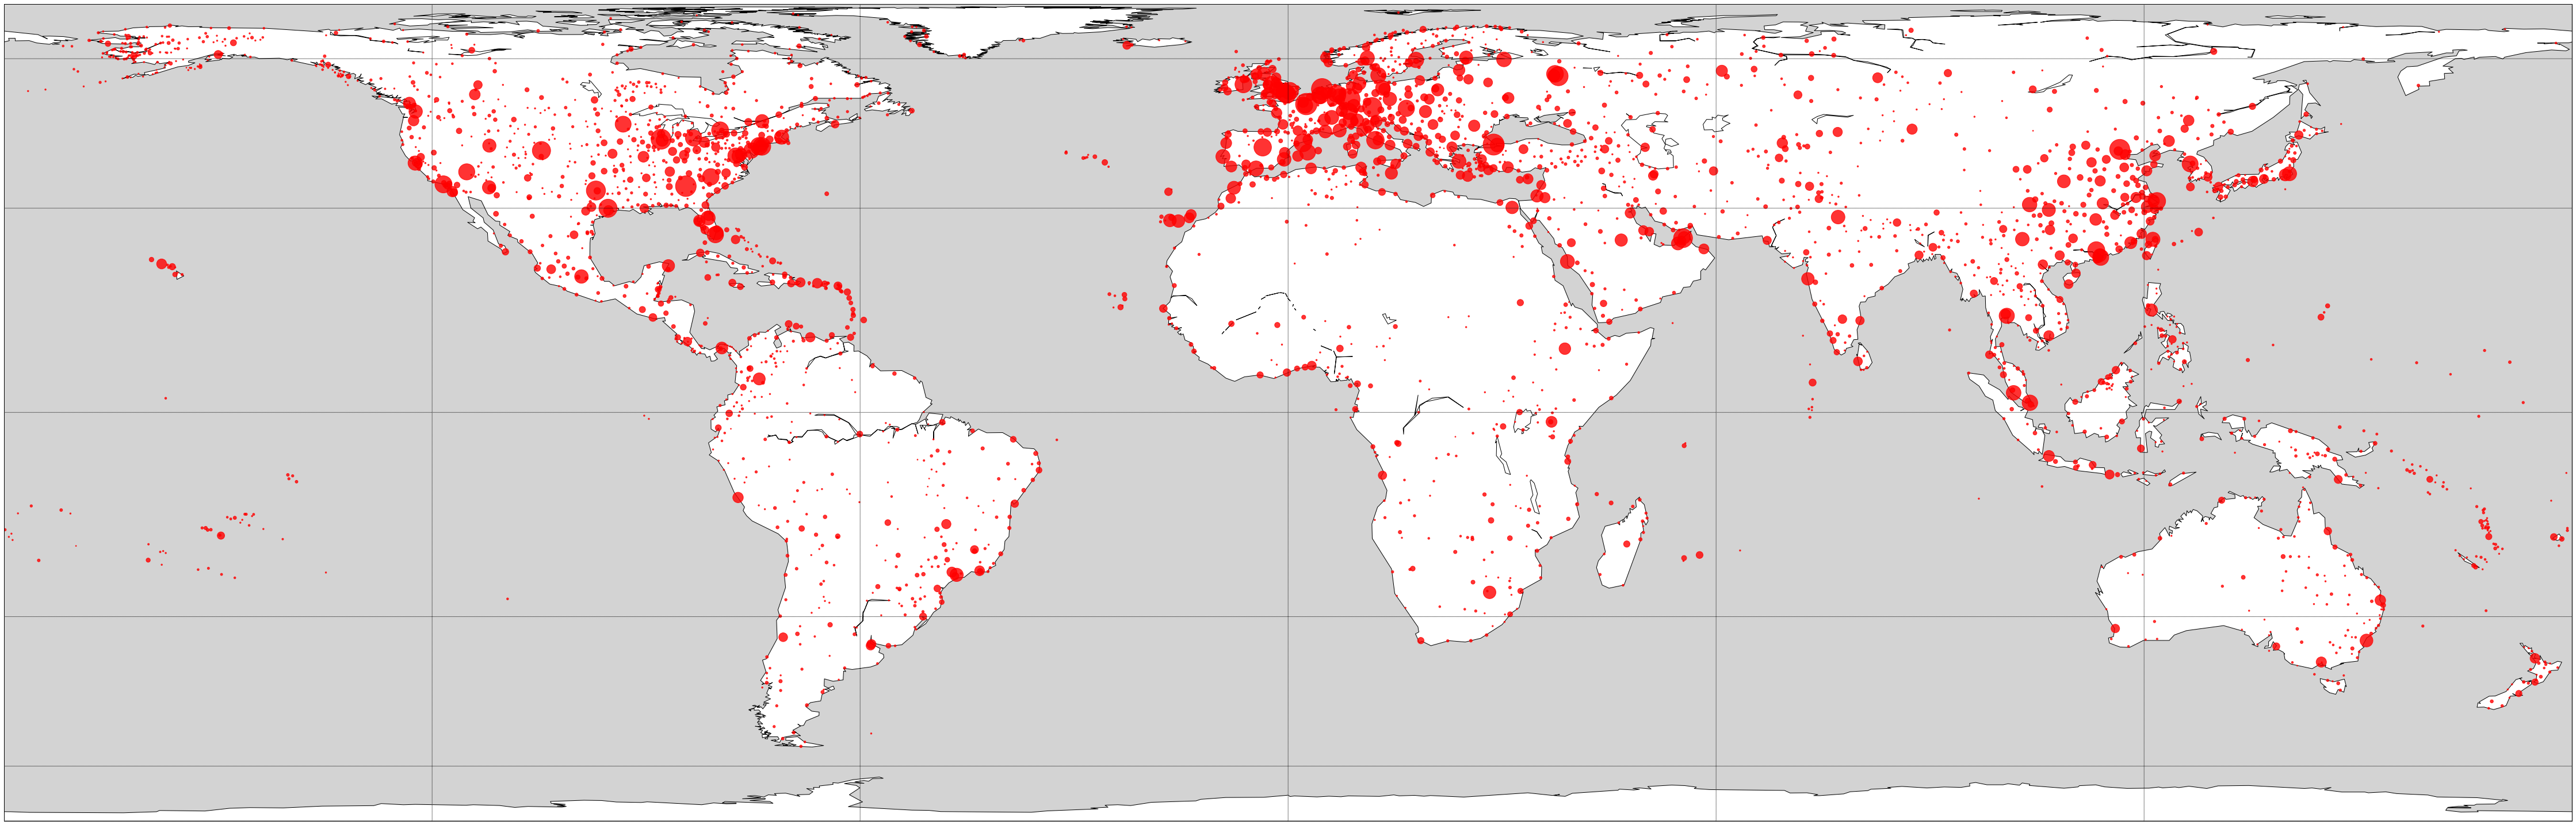

In [ ]:
fig = plt.figure(figsize=(80, 60), edgecolor='w')
m = Basemap(projection='cea',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c',suppress_ticks = True)
mx, my = m(pos_data['Longitude'].values, pos_data['Latitude'].values)
pos = {}
m.drawcoastlines()
m.fillcontinents(color='white')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='lightgrey')
for count, elem in enumerate (pos_data['IATA']):
  pos[elem] = (mx[count], my[count])
nx.draw_networkx_nodes(G = graph_new, pos = pos, nodelist = graph_new.nodes(), node_color = 'r', alpha = 0.8, node_size = [routes_counts['total_flight'][s]*3 for s in graph_new.nodes()])

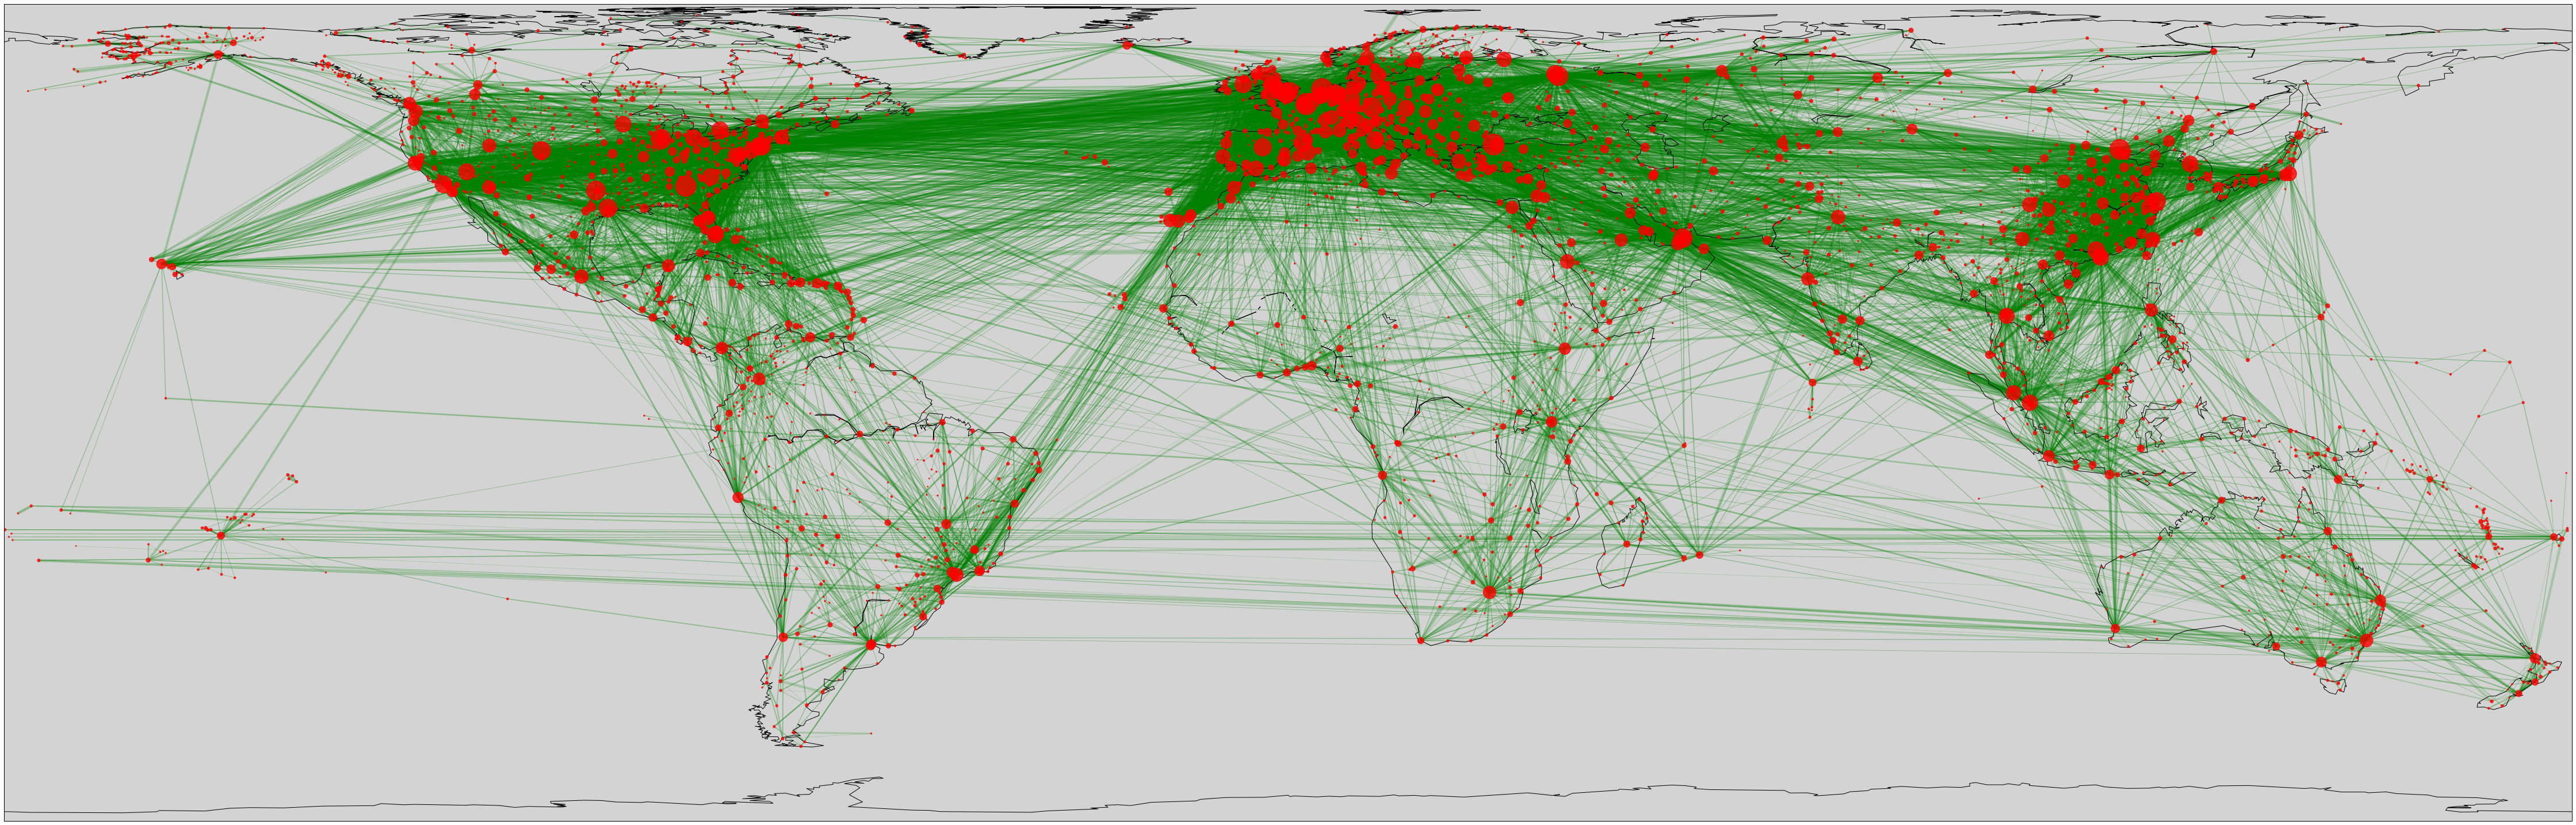

In [ ]:
fig = plt.figure(figsize=(80, 60), edgecolor='w')
m = Basemap(projection='cea',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c',suppress_ticks = True)
m.drawcoastlines()
m.drawmapboundary(fill_color='lightgrey')
nx.draw_networkx_nodes(G = graph_new, pos = pos, nodelist = graph_new.nodes(), node_color = 'r', alpha = 0.8, node_size = [routes_counts['total_flight'][s]*3 for s in graph_new.nodes()])
nx.draw_networkx_edges(G = graph_new, pos = pos, edge_color='g', width = routes_new['counts']*0.75, alpha=0.2, arrows = False)
# draw parallels and meridians.
plt.show()

In [ ]:
hubs_dict = nx.degree_centrality(graph_new)
top10hubs = {k: hubs_dict[k] for k in list(hubs_dict)[:10]}
print("\nThe top 10 hubs are: ")
k=0
data = []
for w in top10hubs:
  country_name = airports.loc[airports["IATA"] == w]["Country"].values[0]
  data.append([w, airports.loc[airports['IATA'] == w]['Airport Name'].values[0], country_name, population.loc[population['Country (or dependency)'] == country_name]['Density (P/Km²)'].values[0], population.loc[population['Country (or dependency)'] == country_name]['Population (2020)'].values[0]])
  k+=1
df = pd.DataFrame(data, columns = ['IATA', 'Airport Name', 'Country (or dependency)', 'Density (P/Km²) of Country', 'Population (2020) of Country'])
df


The top 10 hubs are: 


IATA  ... Population (2020) of Country
0  AAE  ...                     43984569
1  ALG  ...                     43984569
2  CDG  ...                     65298930
3  IST  ...                     84495243
4  LYS  ...                     65298930
5  MRS  ...                     65298930
6  ORN  ...                     43984569
7  ORY  ...                     65298930
8  AAL  ...                      5795780
9  AAR  ...                      5795780

[10 rows x 5 columns]

In [ ]:
print("\nThe top 10 most influential airports are: ")
most_influential = nx.degree_centrality(graph_new)
k=0
data = []
for w in sorted(most_influential, key = most_influential.get, reverse = True):
  if(k<10):
    country_name = airports.loc[airports["IATA"] == w]["Country"].values[0]
    data.append([w, most_influential[w], airports.loc[airports['IATA'] == w]['Airport Name'].values[0], country_name, population.loc[population['Country (or dependency)'] == country_name]['Density (P/Km²)'].values[0], population.loc[population['Country (or dependency)'] == country_name]['Population (2020)'].values[0]])
    k+=1
df = pd.DataFrame(data, columns = ['IATA', 'Degree Centrality', 'Airport Name', 'Country (or dependency)', 'Density (P/Km²) of Country', 'Population (2020) of Country'])
df


The top 10 most influential airports are: 


IATA  ...  Population (2020) of Country
0  FRA  ...                      83830972
1  CDG  ...                      65298930
2  AMS  ...                      17141544
3  IST  ...                      84495243
4  ATL  ...                     331341050
5  PEK  ...                    1440297825
6  ORD  ...                     331341050
7  MUC  ...                      83830972
8  DME  ...                     145945524
9  DFW  ...                     331341050

[10 rows x 6 columns]

In [ ]:
#finding the most busiest hubs
busy = []
most_busiest = nx.eigenvector_centrality(graph_new)
k = 0
data = []
print("\nThe top 10 busiest airports are: ")
for w in sorted(most_busiest, key=most_busiest.get, reverse=True):
  if(k < 10):
    country_name = airports.loc[airports["IATA"] == w]["Country"].values[0]
    data.append([w, most_busiest[w], airports.loc[airports['IATA'] == w]['Airport Name'].values[0], country_name, population.loc[population['Country (or dependency)'] == country_name]['Density (P/Km²)'].values[0], population.loc[population['Country (or dependency)'] == country_name]['Population (2020)'].values[0]])
  if(k<30):
    busy.append(w)
    k+=1
df = pd.DataFrame(data, columns = ['IATA', 'Eigenvector Centrality','Airport Name', 'Country (or dependency)', 'Density (P/Km²) of Country', 'Population (2020) of Country'])
df


The top 10 busiest airports are: 


IATA  ...  Population (2020) of Country
0  AMS  ...                      17141544
1  FRA  ...                      83830972
2  CDG  ...                      65298930
3  MUC  ...                      83830972
4  LHR  ...                      67948282
5  FCO  ...                      60446035
6  BCN  ...                      46757980
7  IST  ...                      84495243
8  ZRH  ...                       8665615
9  MAD  ...                      46757980

[10 rows x 6 columns]

In [ ]:
#Finding the best connecting hubs
best_con = []
best_connector = nx.betweenness_centrality(graph_new)
k=0
data = []
print("\nThe top 10 best connecting airports are: ")
for w in sorted(best_connector, key=best_connector.get, reverse=True):
  if(k<10):
    country_name = airports.loc[airports["IATA"] == w]["Country"].values[0]
    data.append([w, best_connector[w], airports.loc[airports['IATA'] == w]['Airport Name'].values[0], country_name, population.loc[population['Country (or dependency)'] == country_name]['Density (P/Km²)'].values[0], population.loc[population['Country (or dependency)'] == country_name]['Population (2020)'].values[0]])
  if(k<30):
    k+=1
    best_con.append(w)
df = pd.DataFrame(data, columns = ['IATA', 'Betweenness Centrality','Airport Name', 'Country (or dependency)', 'Density (P/Km²) of Country', 'Population (2020) of Country'])
df


The top 10 best connecting airports are: 


IATA  ...  Population (2020) of Country
0  ANC  ...                     331341050
1  LAX  ...                     331341050
2  DXB  ...                       9910892
3  CDG  ...                      65298930
4  FRA  ...                      83830972
5  PEK  ...                    1440297825
6  ORD  ...                     331341050
7  AMS  ...                      17141544
8  YYZ  ...                      37799407
9  SEA  ...                     331341050

[10 rows x 6 columns]

In [ ]:
# Printing the next potential hubs for the airlines
# If the airports are not the hubs, but they do exist in most busiest and most important ports.
print("\nThe next potential hubs could be: ")
k=0
data = []
for w in busy:
  if w in best_con:
    if w not in top10hubs:
      country_name = airports.loc[airports["IATA"] == w]["Country"].values[0]
      data.append([w, airports.loc[airports['IATA'] == w]['Airport Name'].values[0], country_name, population.loc[population['Country (or dependency)'] == country_name]['Density (P/Km²)'].values[0], population.loc[population['Country (or dependency)'] == country_name]['Population (2020)'].values[0]])
      k+=1
df = pd.DataFrame(data, columns = ['IATA', 'Airport Name', 'Country (or dependency)', 'Density (P/Km²) of Country', 'Population (2020) of Country'])
df


The next potential hubs could be: 


IATA  ... Population (2020) of Country
0  AMS  ...                     17141544
1  FRA  ...                     83830972
2  LHR  ...                     67948282
3  MAD  ...                     46757980
4  JFK  ...                    331341050
5  DXB  ...                      9910892
6  ORD  ...                    331341050
7  YYZ  ...                     37799407

[8 rows x 5 columns]

In [ ]:
print("\nThe top 10 used routes are: ")
most_important_edge = nx.edge_betweenness_centrality(graph_new)
k = 0
data = []
for w in sorted(most_important_edge, key = most_important_edge.get, reverse = True):
  if(k<10):
    data.append([w[0], airports.loc[airports['IATA'] == w[0]]['Airport Name'].values[0], w[1], airports.loc[airports['IATA'] == w[1]]['Airport Name'].values[0], most_important_edge[w]])
    k+=1
df = pd.DataFrame(data, columns = ['IATA Source Airport', 'Source Airport Name', 'IATA Destination Airport', 'Source Destination Name',  'Edge Betweenness Centrality'])
df


The top 10 used routes are: 


IATA Source Airport  ... Edge Betweenness Centrality
0                 LAX  ...                    0.010718
1                 ANC  ...                    0.010013
2                 BET  ...                    0.009434
3                 ANC  ...                    0.009382
4                 ORD  ...                    0.008970
5                 ANC  ...                    0.008419
6                 FAI  ...                    0.007036
7                 SEA  ...                    0.006965
8                 YQT  ...                    0.005748
9                 YYZ  ...                    0.005457

[10 rows x 5 columns]

In [ ]:
nx.shortest_path(routes_graph,"MSP","BOM")

['MSP', 'DTW', 'ICN', 'BOM']